In [22]:
#MNIST
# DataLoader, Transformation
#Multilayer Neural Net, activation function
# Loss and Optimizer
# Training loop(batch training)
# Model Evaluation
# GPU Support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')

# hyper parameters

input_size = 784 #28 x 28
hidden_size = 100
n_classes = 10
epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)


100%|████████████████████████████| 9912422/9912422 [00:02<00:00, 4366378.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 20294135.34it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 5621620.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 5081496.07it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


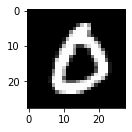

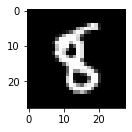

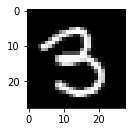

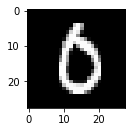

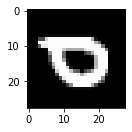

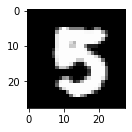

In [25]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0], cmap = 'gray')
    plt.show()

In [34]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, n_classes).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28 * 28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch +1}/ {epochs}, step {i+1}/{n_total_steps}, loss = {loss.item(): .4f}')
            

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images , labels in test_loader:
        images = images.reshape(-1,28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        _, predictions  = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    
    print(f'accuracy={acc}')

epoch 1/ 2, step 100/600, loss =  0.3674
epoch 1/ 2, step 200/600, loss =  0.3247
epoch 1/ 2, step 300/600, loss =  0.2257
epoch 1/ 2, step 400/600, loss =  0.2201
epoch 1/ 2, step 500/600, loss =  0.3381
epoch 1/ 2, step 600/600, loss =  0.2465
epoch 2/ 2, step 100/600, loss =  0.1121
epoch 2/ 2, step 200/600, loss =  0.2836
epoch 2/ 2, step 300/600, loss =  0.2574
epoch 2/ 2, step 400/600, loss =  0.2529
epoch 2/ 2, step 500/600, loss =  0.1774
epoch 2/ 2, step 600/600, loss =  0.1839
accuracy=95.74
